In [1]:
import pandas as pd

In [6]:
f = open('./datos_full.csv','r')
data = pd.read_csv(f,sep="|",error_bad_lines=False)

In [3]:
data.replace({'related_Adaptation': {"si": 1, "no":0 }},  inplace = True)
data.replace({'related_Side_story': {"si": 1, "no":0 }},  inplace = True)

In [4]:
data.replace({'volumes': {"Unknown": 0}},  inplace = True)
data.replace({'chapters': {"Unknown": 0}},  inplace = True)

In [5]:
data.replace({'type': {"Doujinshi": 0}},  inplace = True)
data.replace({'type': {"Manga": 1}},  inplace = True)
data.replace({'type': {"Manhua": 2}},  inplace = True)
data.replace({'type': {"Manhwa": 3}},  inplace = True)
data.replace({'type': {"Novel": 4}},  inplace = True)
data.replace({'type': {"One-shot": 5}},  inplace = True)

In [6]:
data.replace({'status': {"Finished": 0}},  inplace = True)
data.replace({'status': {"Publishing": 1}},  inplace = True)

In [7]:
data.replace({'published_to': {"False": 0}},  inplace = True)
data.replace({'published_to': {"None": 0}},  inplace = True)
data.replace({'published_from': {"False": 0}},  inplace = True)
data.replace({'published_from': {"None": 0}},  inplace = True)


In [8]:
data.replace({'rank': {"None": 0}},  inplace = True)

In [9]:
data.drop(['mal_id', 'title'], axis=1, inplace=True)

In [10]:
def rango_fecha(fecha):
    if fecha == "none":
        return -1
    if int(fecha) < 1940:
        return 0
    if int(fecha) < 1950:
        return 1
    if int(fecha) < 1960:
        return 2
    if int(fecha) < 1970:
        return 3
    if int(fecha) < 1980:
        return 4
    if int(fecha) < 1990:
        return 5
    if int(fecha) < 2000:
        return 6
    if int(fecha) < 2005:
        return 7
    if int(fecha) < 2010:
        return 8
    if int(fecha) < 2015:
        return 9
    if int(fecha) < 2020:
        return 10
    else:
        return -1

In [11]:
def rango_fecha_mes(fecha):
    if fecha == 0:
        return -1
    if int(fecha) < 4:
        return 0
    if (int(fecha)>3 and (int(fecha)<7)):
        return 1
    if (int(fecha)>6 and (int(fecha)<9)):
        return 2
    if (int(fecha)>8 and (int(fecha)<13)):
        return 3
    else:
        return -1

In [12]:
from datetime import datetime
def año(df):
    stack_año=[]
    for fechas in df: 
        if fechas == 0:
            stack_año.append(0)
        else:
            fecha_año = fechas[:4]
            stack_año.append(rango_fecha(fecha_año))
    return stack_año

def mes(df):
    stack_mes=[]
    for fechas in df:
        if fechas == 0:
            stack_mes.append(rango_fecha_mes(0))
        else:
            fecha_mes = fechas[5:]
            fecha_mes=fecha_mes[:2]
            if(fecha_mes !=""):
                stack_mes.append(int(rango_fecha_mes(fecha_mes)))
            else:
                stack_mes.append(rango_fecha_mes(0))
    return stack_mes

In [13]:
data['año_f']=año(data.published_from)
data['mes_f']=mes(data.published_from)
data['año_t']=año(data.published_to)
data['mes_t']=mes(data.published_to)

In [14]:
data.drop(['published_from','published_to'], axis=1, inplace=True)

In [15]:
def volumne_rango(volum):
    if int(volum) < 1:
        return int(0)
    if int(volum) < 2:
        return int(1)
    if int(volum) < 4:
        return int(2)
    if int(volum) < 6:
        return int(3)
    if int(volum) < 8:
        return int(4)
    if int(volum) < 10:
        return int(5)
    if int(volum) < 20:
        return int(6)
    if int(volum) < 30:
        return int(7)
    if int(volum) < 40:
        return int(8)
    if int(volum) < 50:
        return int(9)
    if int(volum) < 60:
        return int(10)
    if int(volum) < 70:
        return int(11)
    if int(volum) < 80:
        return int(12)
    if int(volum) < 90:
        return int(13)
    if int(volum) < 100:
        return int(14)
    if int(volum) < 120:
        return int(15)
    if int(volum) < 140:
        return int(16)
    if int(volum) < 160:
        return int(17)
    if int(volum) < 180:
        return int(18)
    if int(volum) < 200:
        return int(19)

In [16]:
def chapters_rango(volum):
    if int(volum) < 1:
        return int(-1)
    if int(volum) < 2:
        return int(1)
    if int(volum) < 4:
        return int(2)
    if int(volum) < 6:
        return int(3)
    if int(volum) < 8:
        return int(4)
    if int(volum) < 10:
        return int(5)
    if int(volum) < 20:
        return int(6)
    if int(volum) < 30:
        return int(7)
    if int(volum) < 40:
        return int(8)
    if int(volum) < 50:
        return int(9)
    if int(volum) < 60:
        return int(10)
    if int(volum) < 70:
        return int(11)
    if int(volum) < 80:
        return int(12)
    if int(volum) < 90:
        return int(13)
    if int(volum) < 100:
        return int(14)
    if int(volum) < 120:
        return int(15)
    if int(volum) < 140:
        return int(16)
    if int(volum) < 160:
        return int(17)
    if int(volum) < 180:
        return int(18)
    if int(volum) < 200:
        return int(19)
    if int(volum) < 220:
        return int(20)
    if int(volum) < 240:
        return int(21)
    if int(volum) < 260:
        return int(22)
    if int(volum) < 280:
        return int(24)

In [17]:
def volumne (df):
    stack_volumne=[]
    for fechas in df:
        stack_volumne.append(volumne_rango(fechas))
    return stack_volumne

In [18]:
def capitulo (df):
    stack_chapters=[]
    for fechas in df:
        stack_chapters.append(chapters_rango(fechas))
    return stack_chapters

In [19]:
data['volumen_rango']=volumne(data.volumes)

In [20]:
data.drop(['volumes'], axis=1, inplace=True)

In [21]:
data['capitulo_rango']=capitulo(data.chapters)

In [22]:
data.drop(['chapters'], axis=1, inplace=True)

In [23]:
def rango_favorite(fecha):
    if fecha == "none":
        return -1
    if int(fecha) < 500:
        return 0
    if int(fecha) < 1000:
        return 1
    if int(fecha) < 5000:
        return 2
    if int(fecha) < 10000:
        return 3
    if int(fecha) < 15000:
        return 4
    if int(fecha) < 20000:
        return 5
    if int(fecha) < 25000:
        return 6
    if int(fecha) < 35000:
        return 7
    if int(fecha) < 40000:
        return 8
    if int(fecha) < 45000:
        return 9
    if int(fecha) < 50000:
        return 10
    else:
        return -1

In [24]:
def favorito (df):
    stack_chapters=[]
    for fechas in df:
        stack_chapters.append(rango_favorite(fechas))
    return stack_chapters

In [25]:
data['favorites_rango']=volumne(data.favorites)
data['popularity_rango']=volumne(data.popularity)

In [26]:
data.drop(['favorites'], axis=1, inplace=True)
data.drop(['popularity'], axis=1, inplace=True)

In [27]:
data.drop(['rank'], axis=1, inplace=True)

In [28]:
def rango_score(score):
    if score == "none":
        return -1
    if float(score) < 1:
        return 0
    if float(score) < 2:
        return 1
    if float(score) < 3:
        return 2
    if float(score) < 4:
        return 3
    if float(score) < 5:
        return 4
    if float(score) < 6:
        return 5
    if float(score) < 7:
        return 6
    if float(score) < 8:
        return 7
    if float(score) < 9:
        return 8
    if float(score) < 10:
        return 9
    if float(score) == 10:
        return 10
    else:
        return -1

In [29]:
def score (df):
    stack_chapters=[]
    for fechas in df:
        stack_chapters.append(rango_score(fechas))
    return stack_chapters

In [30]:
data['score_rango']=score(data.score)

In [31]:
data.drop(['score'], axis=1, inplace=True)

In [32]:
data.drop(['scored_by'], axis=1, inplace=True)

In [33]:
anime=data[(data.related_Adaptation==1) & (data.related_Side_story==1)]
manga=data[(data.related_Side_story==0) & (data.related_Adaptation==0)]
manga_alter = data[(data.related_Side_story==1) & (data.related_Adaptation==0)]
otro = data[(data.related_Side_story==0) & (data.related_Adaptation==1)]

In [34]:
anime.to_csv("./data/anime.csv", sep=';', encoding='utf-8',index = False)
manga.to_csv("./data/manga.csv", sep=';', encoding='utf-8',index = False)
manga_alter.to_csv("./data/manga_alternativo.csv", sep=';', encoding='utf-8',index = False)

In [3]:
f2 = open('./anime.csv','r')
data_anime = pd.read_csv(f2,sep=";",error_bad_lines=False)

<hr>
<a href="http://www.emilkhatib.es/representaciones-graficas-con-seaborn/"> Graficas </a>
<hr>

In [36]:
import matplotlib.pyplot as plt

In [37]:
plt.figure();

<Figure size 432x288 with 0 Axes>

In [38]:
index=anime.keys()
index

Index(['status', 'type', 'related_Side_story', 'related_Adaptation', 'generos',
       'author', 'serialization', 'año_f', 'mes_f', 'año_t', 'mes_t',
       'volumen_rango', 'capitulo_rango', 'favorites_rango',
       'popularity_rango', 'score_rango'],
      dtype='object')

In [39]:
import seaborn as sns

In [45]:
nuevo = data_anime[['status', 'type','volumen_rango', 'capitulo_rango','score_rango', 'favorites_rango','año_f', 'mes_f', 'año_t','mes_t']]
nuevo2 = data[['status', 'type','volumen_rango', 'capitulo_rango','score_rango', 'favorites_rango','año_f', 'mes_f', 'año_t','mes_t']]

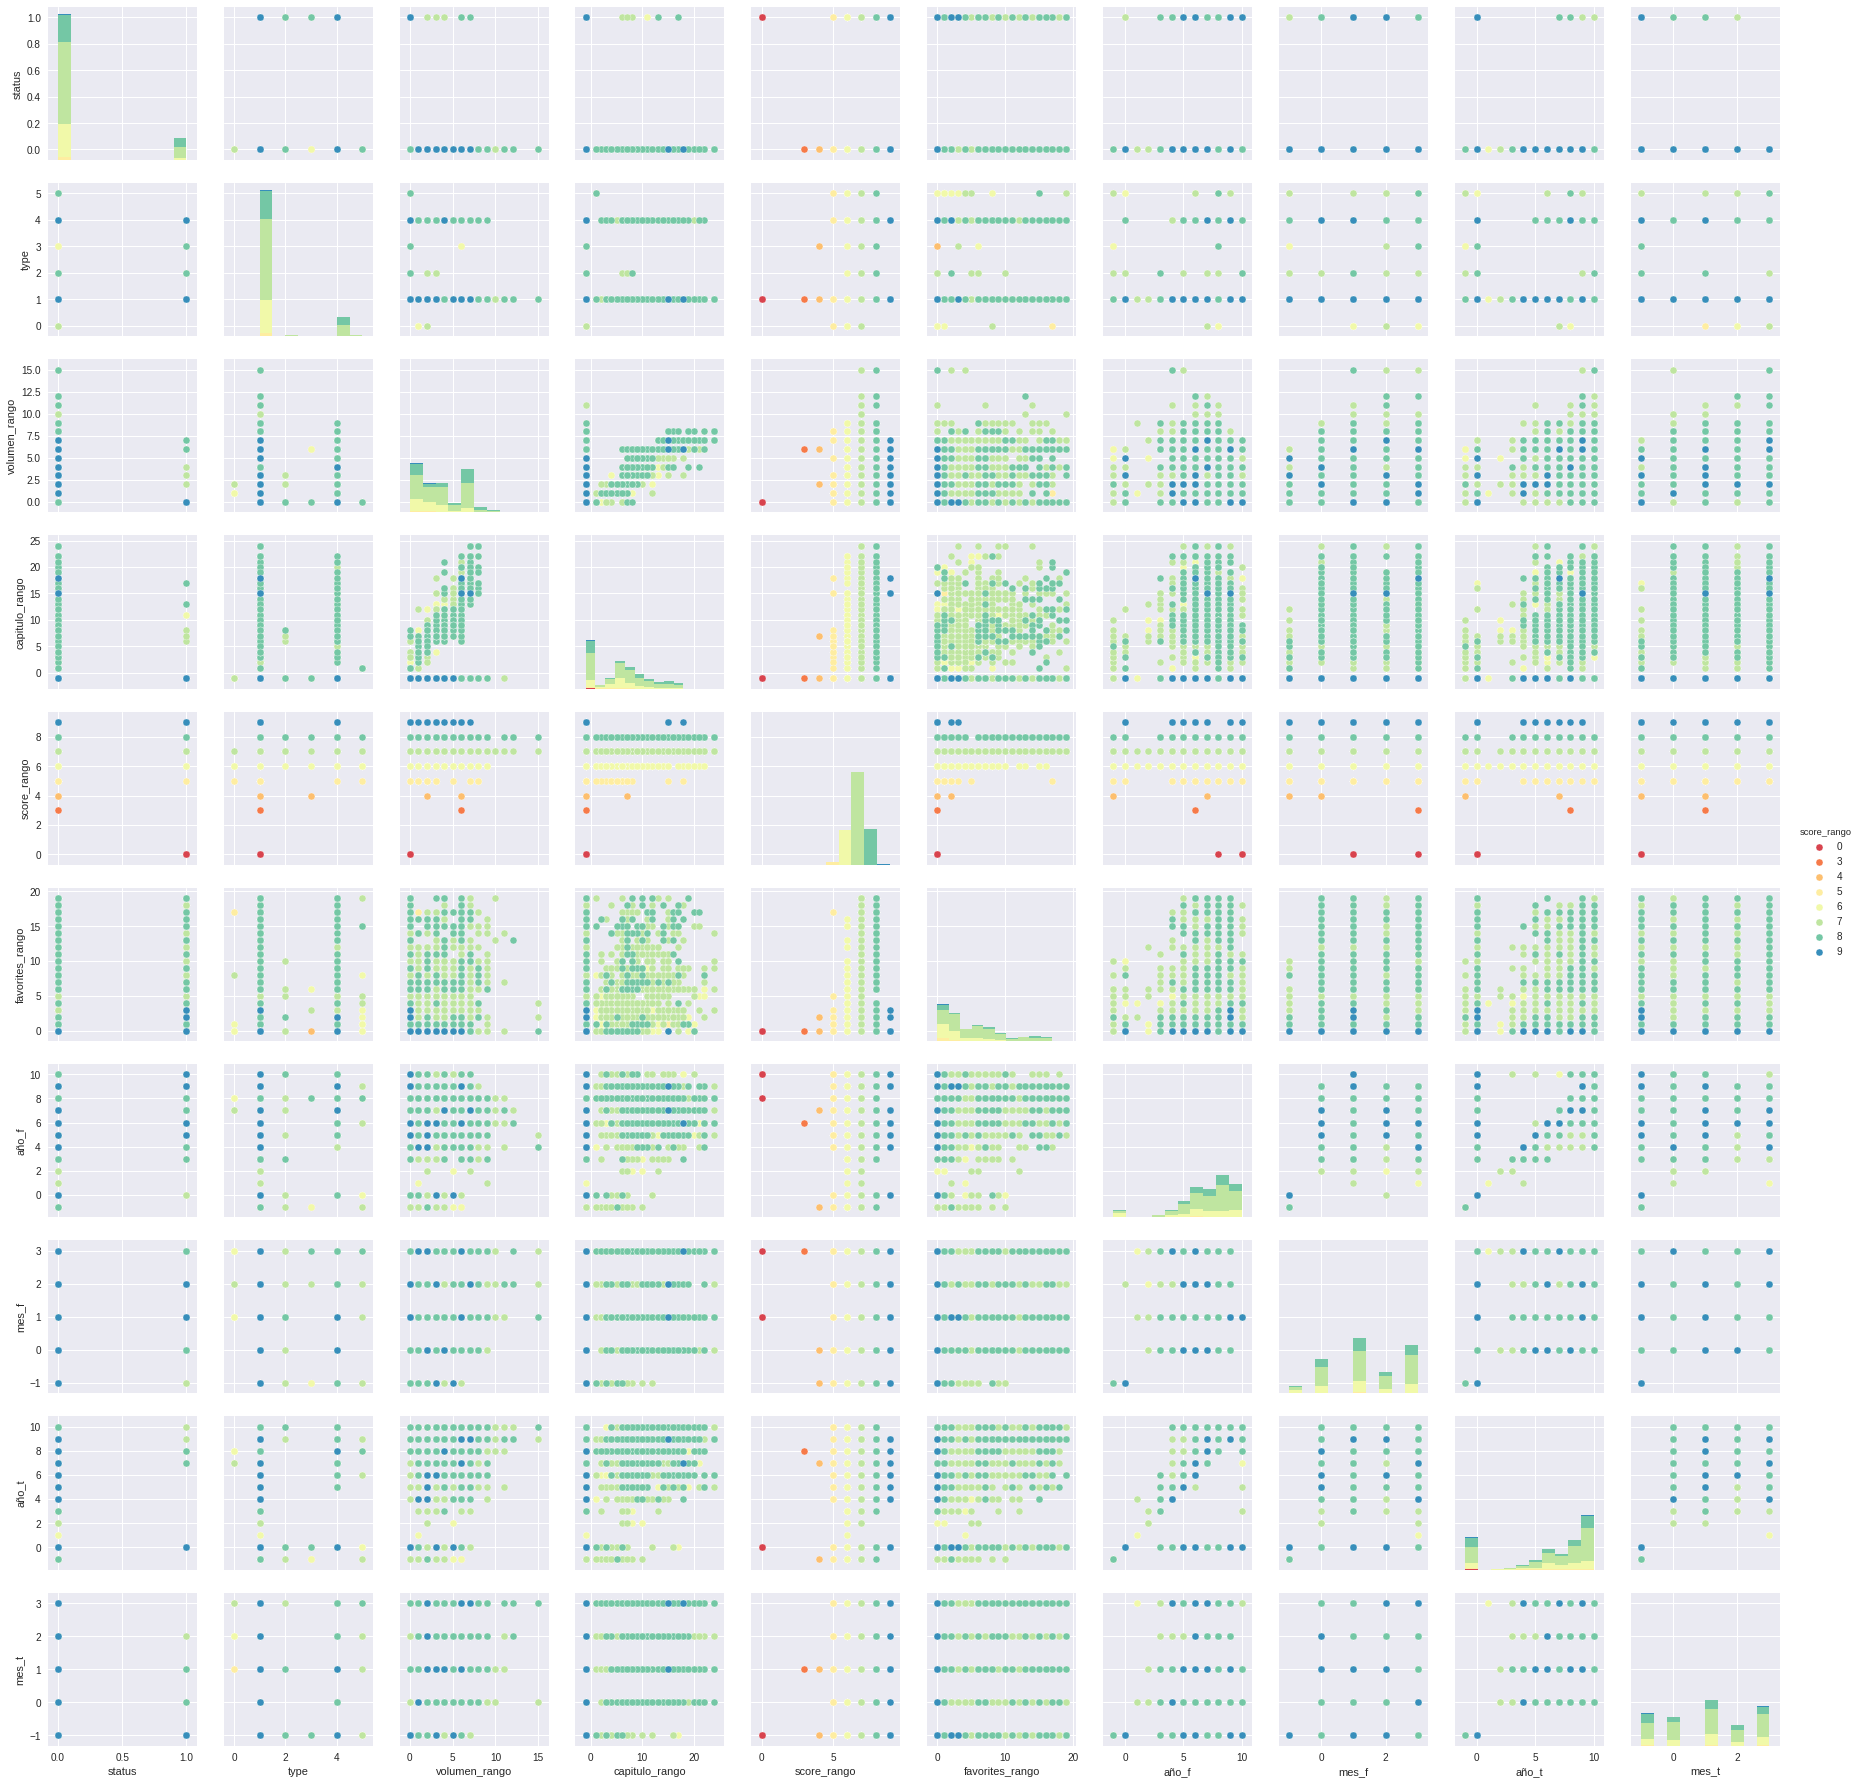

In [47]:
g=sns.pairplot(nuevo,hue="score_rango",palette="Spectral")

In [ ]:
.g=sns.pairplot(nuevo2,hue="type",palette="Spectral")

In [ ]:
grid = sns.FacetGrid(nuevo, col='mes_t', hue='año_t')
grid.map(plt.scatter,'mes_t','año_t').add_legend()
plt.show()


In [ ]:
sns.regplot( 'volumen_rango', 'favorites_rango',data)
plt.show()

In [ ]:
anime.groupby('popularity').type.count()

In [ ]:
anime.info()

In [9]:
data[(data.generos.str.contains('Hentai'))& (data.related_Adaptation=='si')]

,mal_id,title,status,type,volumes,chapters,published_from,published_to,rank,score,scored_by,popularity,favorites,related_Side_story,related_Adaptation,generos,author,serialization
603,632,Love Selection,Finished,Manga,1,11,2006-06-19,2006-06-19,None,7.58,1102,3747,27,si,si,"Hentai,Romance","Kisaragi, Gunma",Comic Megastore
1262,1394,Shoujo Sect,Finished,Manga,2,16,2003-06-17,2005-09-17,None,7.20,2895,1300,130,si,si,"Drama,Hentai,Romance,School,Yuri","Kurogane, Kenn",Comic Megastore
1263,1395,Swing Out Sisters,Finished,Manga,1,8,2004-05-22,2005-07-16,None,7.20,406,6622,10,si,si,"Hentai,Romance","Shinonome, Tarou",Comic RiN
2792,3234,Choisuji,Finished,Manga,1,10,2004-02-21,2005-03-19,None,6.74,79,17017,0,si,si,"Comedy,Hentai,School","Asaki, Takayuki",Comic LO
2845,3300,Hatsu Inu,Finished,Manga,3,22,2005-10-22,2008-04-25,None,7.70,1020,3502,48,si,si,"Comedy,Hentai,Romance,School,Harem",Inu,Bishoujo-teki Kaikatsuryoku
2947,3437,5-4-3-2-1 Count Down,Finished,Manga,1,11,none,none,None,6.39,79,16703,1,si,si,"Hentai,Yuri,Psychological,Gender Bender","Utatane, Hiroyuki",none
2996,3501,Inbaku Gakuen,Finished,Manga,1,6,None,None,None,6.40,86,17018,3,si,si,"Drama,Hentai,School,Psychological","Funabori, Nariaki",none
3233,3805,Yoru no Houteishiki,Finished,Manga,1,8,None,None,None,6.68,118,15690,2,si,si,"Demons,Mystery,Drama,Hentai,School,Supernatura...","Azuki, Kurenai",none
3242,3815,Nosewasure,Finished,Manga,1,8,1999-02-28,2005-09-28,None,7.02,355,8629,3,si,si,"Hentai,Romance,School,Yuri",Shiwasu no Okina,Comic Aun
3250,3823,Warau Kangofu,Finished,Manga,1,11,2002-06-01,2005-06-17,None,7.17,314,9678,3,si,si,Hentai,"Yonekura, Kengo",Comic Megastore
